In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                564 non-null    object 
 1   radius_mean              564 non-null    float64
 2   texture_mean             564 non-null    float64
 3   perimeter_mean           564 non-null    float64
 4   area_mean                564 non-null    float64
 5   smoothness_mean          564 non-null    float64
 6   compactness_mean         564 non-null    float64
 7   concavity_mean           564 non-null    float64
 8   concave points_mean      564 non-null    float64
 9   symmetry_mean            564 non-null    float64
 10  fractal_dimension_mean   564 non-null    float64
 11  radius_se                564 non-null    float64
 12  texture_se               564 non-null    float64
 13  perimeter_se             564 non-null    float64
 14  area_se                  5

In [4]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,...,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,14.115583,19.295709,91.887323,653.904787,0.096294,0.104228,0.088689,0.048769,0.181140,0.062800,...,16.241505,25.669060,107.072411,877.409752,0.132209,0.254072,0.271525,0.114188,0.289870,0.083933
std,3.530083,4.310222,24.341840,352.430795,0.014091,0.052851,0.079928,0.038852,0.027453,0.007059,...,4.825873,6.151016,33.549222,567.742448,0.022822,0.157790,0.209034,0.065643,0.062031,0.018087
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.687500,16.177500,75.022500,419.525000,0.086038,0.064315,0.029400,0.020300,0.161975,0.057775,...,13.002500,21.095000,84.057500,513.975000,0.116500,0.145925,0.113925,0.064103,0.250150,0.071270
50%,13.320000,18.835000,86.140000,546.350000,0.095785,0.092525,0.060705,0.033375,0.179200,0.061545,...,14.940000,25.405000,97.620000,684.550000,0.131250,0.211850,0.226200,0.099425,0.281850,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130425,0.129650,0.073730,0.195625,0.066120,...,18.602500,29.547500,125.175000,1055.000000,0.146000,0.339300,0.381400,0.161325,0.317675,0.092082
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
X=data.drop('diagnosis',axis=1)
y=data[['diagnosis']]

In [6]:
print(y)

    diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
559         M
560         M
561         M
562         M
563         B

[564 rows x 1 columns]


In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=LE.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1
 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.3, random_state=42)

In [10]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(max_iter=500)

In [11]:
y_pred=mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[102,   1],
       [  8,  59]])

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       103
           1       0.98      0.88      0.93        67

    accuracy                           0.95       170
   macro avg       0.96      0.94      0.94       170
weighted avg       0.95      0.95      0.95       170



###Building the ANN Model

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
n_features=X_train.shape[1]
print(n_features)

30


In [16]:
model=Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features, )))

In [17]:
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

###Compiling the model

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###Fitting the model

In [19]:
history=model.fit(X_train,y_train, epochs=150, validation_data=(X_test,y_test), batch_size=32, verbose=0)

###Model validation

In [20]:
loss, acc=model.evaluate(X_test,y_test, verbose=0)

print(f"The loss are {loss}, The accuracy are {acc}")

The loss are 0.08185161650180817, The accuracy are 0.9823529124259949


###Plotting accuracy and loss

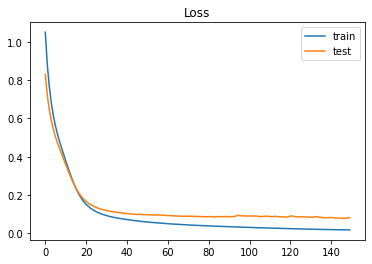

In [21]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

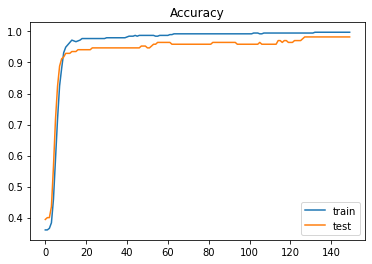

In [22]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

###Confusion Matrix and Classification Report

In [23]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)
y_pred

6/6 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [

In [24]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

6/6 [==============================] - 0s 2ms/step


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[101,   2],
       [  1,  66]])

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.97      0.99      0.98        67

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



###Predicting new cases

In [27]:
import csv
validation=pd.read_csv('/content/Validate.csv')
valid_list=validation.values.tolist()
print(valid_list)

[['M', 14.68, 20.13, 94.74, 684.5, 0.09867, 0.072, 0.07395, 0.05259, 0.1586, 0.05922, 0.4727, 1.24, 3.195, 45.4, 0.005718, 0.01162, 0.01998, 0.01109, 0.0141, 0.002085, 19.07, 30.88, 123.4, 1138.0, 0.1464, 0.1871, 0.2914, 0.1609, 0.3029, 0.08216], ['M', 16.13, 20.68, 108.1, 798.8, 0.117, 0.2022, 0.1722, 0.1028, 0.2164, 0.07356, 0.5692, 1.073, 3.854, 54.18, 0.007026, 0.02501, 0.03188, 0.01297, 0.01689, 0.004142, 20.96, 31.48, 136.8, 1315.0, 0.1789, 0.4233, 0.4784, 0.2073, 0.3706, 0.1142], ['M', 19.81, 22.15, 130.0, 1260.0, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398.0, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615], ['B', 13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259], ['B', 13.08, 15

In [28]:
for i in range(0,5):
  data=valid_list[i][1:]
  print(model.predict(sc.transform([data])) > 0.5)

1/1 [==============================] - 0s 19ms/step
[[ True]]
1/1 [==============================] - 0s 17ms/step
[[ True]]
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


[[ True]]
1/1 [==============================] - 0s 22ms/step
[[False]]
1/1 [==============================] - 0s 19ms/step
[[False]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
